In [15]:
ROOT_PATH = "./working/c2c_char_level/cVAE_with_BOW_loss/run1508659693/"

import jieba

word_seg = True

gen_file = ROOT_PATH + "test.txt"

response2src = {}

fout = open(ROOT_PATH + "gen.txt", 'w')
with open(gen_file, 'r') as fin:
    for line in fin:
        line = line.strip()
        if line.startswith("Batch"):
            src = ""
        elif line.startswith("Src"):
            src += line[11:-4] + "\n"
        elif line.startswith("Sample"):
            response = line.split(">>", 1)[1].strip()
            # word seg
            if word_seg:
                response = " ".join(jieba.lcut("".join(response.split(" ")))).encode("utf8")
            if len(response.split(" ")) - len(set(response.split(" "))) == 0:
                print >> fout, response
                response2src[response] = src.strip()
            
fout.close()

In [16]:
sen_score = {}

with open(ROOT_PATH + "gen.txt", 'r') as f_sen:
    with open(ROOT_PATH + "gen_prob.txt", 'r') as f_score:
        for sen, score in zip(f_sen, f_score):
            if score.strip() != "OOV":
                sen_score[sen.strip()] = float(score)
            

78771


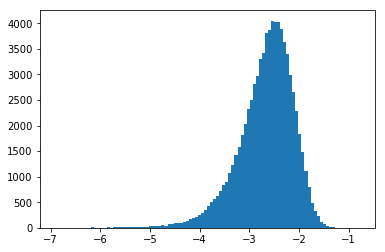

In [17]:
%matplotlib inline

print len(sen_score)

from matplotlib import pyplot as plt

#h = plt.hist(sen_score.values(), 100)

h = plt.hist([score/len(sen.split(" ")) for sen, score in sen_score.items()], 100)

In [18]:
src2response = {}
for sen, src in response2src.items():
    score = sen_score.get(sen, -100000)/len(sen.split(" "))
    if score > -2:
        src2response.setdefault(src, [])
        src2response[src].append((sen, score))

print len(src2response)
with open(ROOT_PATH + "final_result.txt", 'w') as fout:
    for src, responses in src2response.items():
        print >> fout, "src: " + src
        for i, sen in enumerate(responses):
            print >> fout, "gen%d: %s (%f)" % (i, sen[0], sen[1])
        print >> fout, ""


341


In [19]:
for sen, score in sen_score.items():
    if score/len(sen.split(" ")) > -1.3:
        print "src: " + response2src[sen] 
        print "gen: " + sen
        print score/len(sen.split(" "))
        print ""

src: 小 法 ： 感 谢 温 格 当 年 的 培 养 
在 加 盟 仅 6 周 后 ， 法 布 雷 加 斯 在 与 罗 瑟 汉 姆 的 联 赛 杯 比 赛 中 得 到 出 场 机 会 ， 也 因 此 成 为 阿 森 纳 一 线 队 最 年 轻 的 出 场 队 员 。 
他 表 示 如 果 当 初 没 有 温 格 的 指 点 ， 自 己 的 职 业 生 涯 肯 定 会 非 常 不 同 。 
温 格 对 我 来 说 应 该 是 最 重 要 的 教 练 ， 他 给 了 我 机 会 ， 这 是 每 个 人 都 想 得 到 的 真 正 的 机 会 。 
在 我 才 1 6 岁 的 时 候 ， 温 格 将 我 带 到 阿 森 纳 ， 并 让 我 成 为 了 一 名 更 好 的 球 员 。 
我 认 为 温 格 是 一 个 特 别 的 教 练 ， 一 个 特 别 的 人 ， 没 有 他 ， 我 也 不 会 达 到 现 在 的 高 度 。
gen: 温格 是 世界 上 最好 的 主教练 。
-1.206522125

src: 小 法 ： 感 谢 温 格 当 年 的 培 养 
在 加 盟 仅 6 周 后 ， 法 布 雷 加 斯 在 与 罗 瑟 汉 姆 的 联 赛 杯 比 赛 中 得 到 出 场 机 会 ， 也 因 此 成 为 阿 森 纳 一 线 队 最 年 轻 的 出 场 队 员 。 
他 表 示 如 果 当 初 没 有 温 格 的 指 点 ， 自 己 的 职 业 生 涯 肯 定 会 非 常 不 同 。 
温 格 对 我 来 说 应 该 是 最 重 要 的 教 练 ， 他 给 了 我 机 会 ， 这 是 每 个 人 都 想 得 到 的 真 正 的 机 会 。 
在 我 才 1 6 岁 的 时 候 ， 温 格 将 我 带 到 阿 森 纳 ， 并 让 我 成 为 了 一 名 更 好 的 球 员 。 
我 认 为 温 格 是 一 个 特 别 的 教 练 ， 一 个 特 别 的 人 ， 没 有 他 ， 我 也 不 会 达 到 现 在 的 高 度 。
gen: 小法 确实 是 世界 上 最好 的 球员 之一 。
-1.2770629

src: 切 尔 西 1 - 0 客 胜 桑 德 兰 收 获 联 赛 十 连 胜 ， 小 法 打 进 联 赛 处 子 球 
北 京 时 间 1 2 月 1

# Gen evaluation dataset for LM

In [ ]:
import random

comments = []
with open("./test.txt", 'r') as fin:
    for line in fin:
        line = line.strip()
        if line.startswith("Batch"):
            src = ""
        elif line.startswith("Src 0"):
            src = "".join(line[11:-4].split(" "))
        elif line.startswith("Sample"):
            response = line.split(">>", 1)[1].strip()
            response = "".join(response.split(" "))
            comments.append((src, response))
    
with open("./eval_for_lm.csv", 'w') as fout:
    for src, response in random.sample(comments, 1000):
        print >> fout, "%s\t%s" % (src, response)